# 3. Machine Learning for Classification
- 3.1 Churn prediction project
- 3.2 Data preparation
- 3.3 Setting up the validation framework
- 3.4 EDA
- 3.5 Feature importance: Churn rate and risk ratio
- 3.6 Feature importance: Mutual information
- 3.7 Feature importance: Correlation
- 3.8 One-hot encoding
- 3.9 Logistic regression
- 3.10 Training logistic regression with Scikit-Learn
- 3.11 Model interpretation
- 3.12 Using the model
- 3.13 Summary
- 3.14 Explore more
- 3.15 Homework

We'll use logistic regression to predict churn

## 3.1 Churn prediction project

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Data preparation
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import urllib.request

In [2]:
url ='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

filename = 'data-week-3.csv'

urllib.request.urlretrieve(url, filename)

('data-week-3.csv', <http.client.HTTPMessage at 0x1f6479e2ad0>)

In [3]:
df = pd.read_csv('data-week-3.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Transposing the `head()` will easily show us the columns as rows so that we can see each column name.

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Again, we want to standardize the formatting of our column names and the `str` data within the dataframe.  The top line takes care of the columns.  The next lines assign a list of columns of datatype 'object' to the variable 'categorical_columns' and then we iterate through each of those columns to perform the lowercase and underscore replacements.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We can see above that 'totalcharges' data is an object rather than some type of integer or float. Let's try to convert it using the pandas method `to_numeric`

In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

We can see that there are records that have a string in that column and not a number. We can modify this to ignore those items.

In [10]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc.isnull().sum()

11

There are 11 records with underscores in the 'totalcharges' column, lets look at those specific records.

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


We are going to fill these records with zeros.  We are choosing to do this for our own reasons, you will not always want to use zeros. Better options might be using the mean or median but for this analysis we are going to use zeros.

In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [13]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [14]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Let's check some of the other variables.

In [15]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

Remember, for machine learning we need numbers, not str objects. Let's convert 'churn', which will be our target variable, to an int depending on what is there. We will convert this and reassign it back to the same variable name.

In [16]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [17]:
df.churn = (df.churn == 'yes').astype(int)

In [18]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

## 3.3 Setting up the validation framework
- Perform the train/validation/test split with Scikit-Learn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?
#using this operator we can see details about the method

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [22]:
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=1)

In [24]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [28]:
df_full_train = df_full_train.reset_index(drop=True)

df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [29]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

We have no missing values.

We can use the `value_counts()` method to see the number of customers that have 'churned'.  1 = a churned customer, while 0 = no churn.  We can add the `normalize=True` argument to calculate the percentage of churn, in this case it is 0.269968. We can also calculate the churn rate using the `.mean()` method. `.mean` works on binary classification columns.

In [30]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [31]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [32]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [33]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

The 'seniorcitizen' is a binary column, 1 = senior citizen, 0 = not senior citizen so we don't want to use that but we do want to use 'tenure', 'monthlycharges' and 'totalcharges'.

In [34]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

Now that we have our numerical columns, we will remove those and create a list of categorical columns.

In [35]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [36]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

We can look at the categorical columns in our dataframe.

In [37]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


We can also look and see the number of unique items in each column in our categorical colummns.

In [38]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

#### Churn rate

We can calculate some importance of the difference of churn from the global, where `more likely to churn < 0 > less likely to churn` in a global - group scenario

In [39]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Our dataset may have different churn rates for different groups such as male or female, dependents or not.

In [40]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [41]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [42]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

There is not much difference for male or female from the global churn mean.

In [43]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [44]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

The difference in churn rate for people with or without a partner is fairly significant. There is roughly a 6% difference between the global churn rate and the churn rate of people with a partner.  This tells us that the partner variable will be more predictive of the churn rate than will gender.

In [45]:
global_churn - churn_partner

0.06493474245795922

#### Risk ratio

The risk ratio is measured by dividing our variable rates by our global churn rate. We see that the 'churn_no_partner' has a higher risk of churn than 'churn_partner'. `more likely to churn > 1 > less likely to churn`

In [46]:
churn_no_partner / global_churn

1.2216593879412643

In [47]:
churn_partner / global_churn

0.7594724924338315

We are doing a relative risk caluclation for groups against the global churn rate.

Here is a SQL example:


    SELECT
        gender,
        AVG(churn),
        AVG(churn) - global_churn AS diff,
        AVG(churn) / global_churn AS risk
    FROM
        data
    GROUP BY
        gender;

In [48]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

We can do what we have done above with some more simple code below. And we can see the different numbers in our small `df_group` dataframe.

In [49]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


We want to do the same thing with ALL of our categorical values. The df_group will not do a print inside of a function so we will import the `display` function from the `IPython.display` library and implement it.

In [50]:
from IPython.display import display

In [51]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()
    

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [52]:
from sklearn.metrics import mutual_info_score

We can use the `mutual_info_score` method from sklearn to caculate the mutual information score between two variables.  Our target variable is 'churn' and we want to see, for instance, how much the variable 'contract' affects the 'churn' rate.  The higher the number the more it is a predictor of churn.

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [55]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [56]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

We can see that 'contract' is the most import predictor of churn and 'gender' is least predictive.

## 3.7 Feature importance: Correlation

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [58]:
df_full_train.tenure.max()

72

In [59]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [60]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [61]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

We can calculate the correlation with one numerical column to the churn rate using `corrwith`.  We can see that 'tenure' is negatively correlated with 'churn'.  This tells us that the longer a customer is with the company the less churn rate there is. 'totalcharges' is also positively correlated with 'tenure', the longer a customer is with the company the higher their 'totalcharges' will be.

Now, let's check some churn rates with various variables that are grouped by time.

In [62]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

For customers that are with the company for 2 or less months, the churn rate is 60%.

In [63]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

For customers that are with the company for more than 2 months, the churn rate is 22%.

In [64]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()

0.3994413407821229

For customers that are with the company for greater than 2 months but less than 12 months, the churn rate is 40%.

In [65]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

For customers that are with the company greater than 1 year, the churn rate is 18%.

In [66]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [67]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50) ].churn.mean()

0.18340943683409436

In [68]:
df_full_train[df_full_train.monthlycharges > 12].churn.mean()

0.26996805111821087

We can see that 'tenure' is negatively correlated with 'churn' and 'monthlycharges' is positively correlated with 'churn'. 

## 3.8 One-hot encoding

- Use Scikit-Learn to encode categorical features

In [69]:
from sklearn.feature_extraction import DictVectorizer

Let's take a look at a small dataframe of the columns 'gender' and 'contract'.

In [70]:
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


We can take the above dataframe and turn it into a dictionary that is oriented to records, or rows in the dataframe.

In [71]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict('record')
dicts

C:\Users\daver\AppData\Local\Temp\ipykernel_25168\7526895.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts = df_train[['gender', 'contract']].iloc[:100].to_dict('record')


[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

Now we need to use the `DictVectorizer` method to turn our dictionary into a vector, so we first create an instance and assign it to variable 'dv', then we do the conversion using `.fits` method.

In [72]:
dv = DictVectorizer()

We can see above that `transform` is forcing us to use a 'Compressed Sparse Row' format, which we do not want to use and we can specify that we don't want to use that by adding the argument 'sparse=False'.

In [74]:
dv = DictVectorizer(sparse=False)

In [75]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [76]:
dv.get_feature_names()

C:\Users\daver\Desktop\DataScience\zoomcamp\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

Using `get_feature_names()` we generate a list of the feature names that correspond with the columns below.  We can see that the first column in our array below is the 'contract=month-to-month' feature.  

In [77]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Now let's create a dictionary that contains all the columns and all the records.

In [78]:
train_dicts = df_train[categorical + numerical].to_dict('records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [79]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [80]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [81]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [82]:
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

We can incorporate fit and transform together in one statement and assign it to our X_train variable.

In [83]:
X_train = dv.fit_transform(train_dicts)

In [84]:
X_train.shape

(4225, 45)

In [85]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

We also need to fit and transform our validation dataset.

In [86]:
val_dicts = df_val[categorical + numerical].to_dict('records')
val_dicts[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 71,
 'monthlycharges': 70.85,
 'totalcharges': 4973.4}

And we just need to use transform on the validation dataset and not fit.

In [87]:
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

Now we can put that all in one block.

In [88]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict('records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict('records')
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

- Binary classification
- Linear vs logistic regression
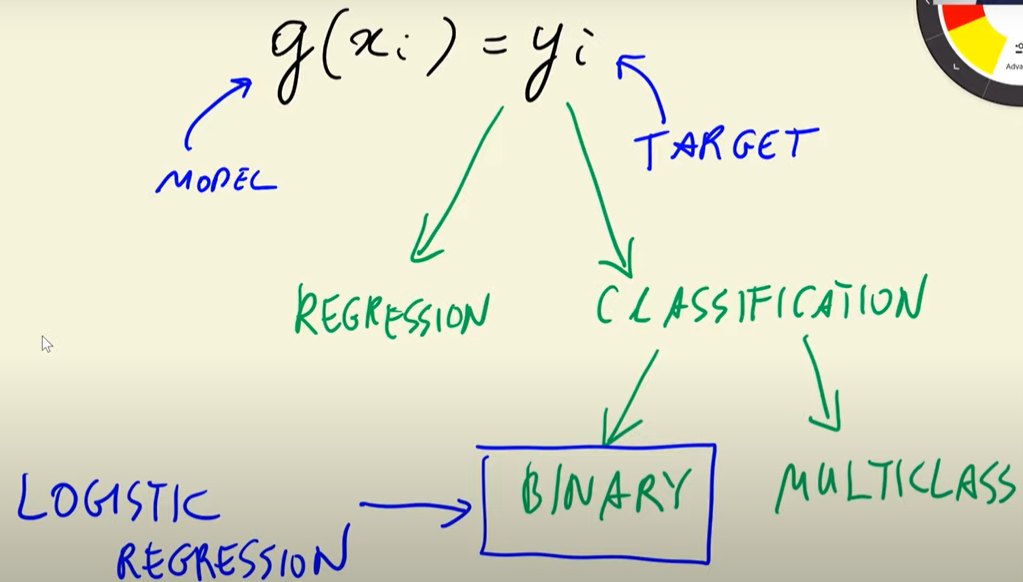

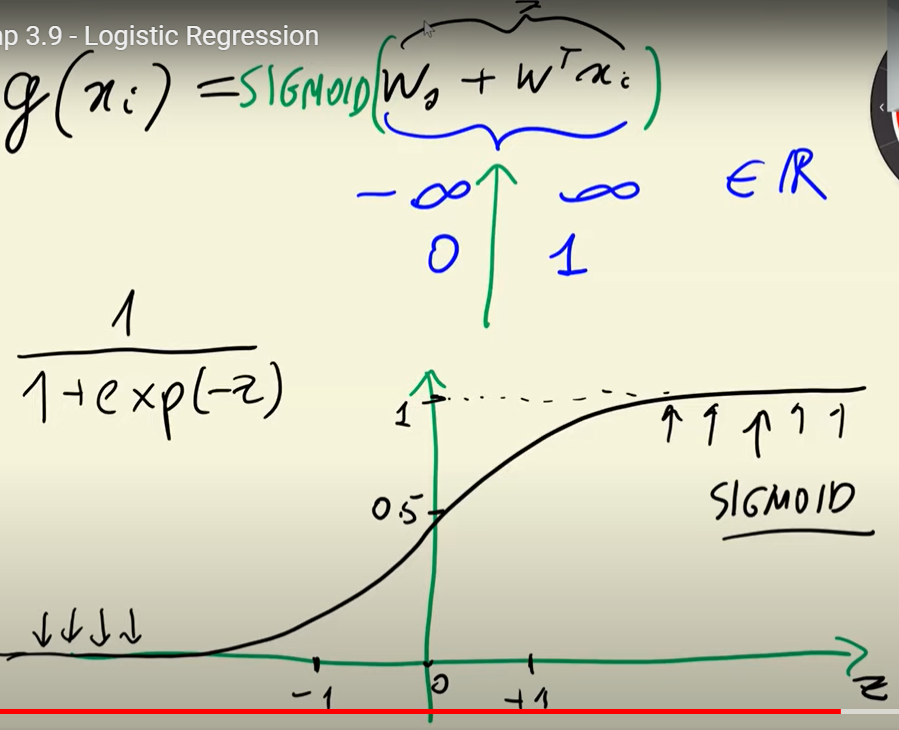

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [90]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [91]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

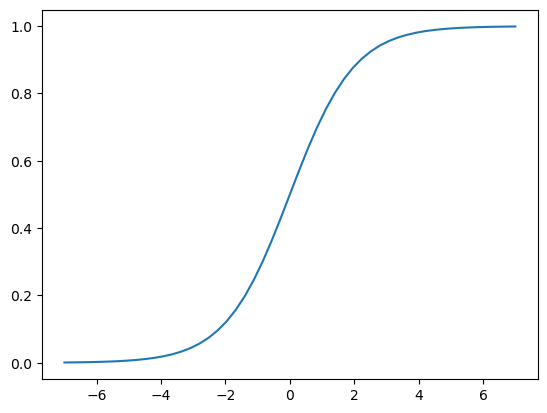

In [92]:
plt.plot(z, sigmoid(z))

In [93]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

A review above of our linear regression function, the logistic regression function is very similar.

In [94]:
def logistic_regression(xi):
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We can see the bias term that will be added to each record.

In [97]:
model.intercept_[0]

-0.10896197525251598

We can see the weights that will be applied to each feature column.

In [98]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

We can create hard predictions. Below we can see that the `model.predict` method will return a 1 = churn, a 0 = no churn. But we don't know that actual probability.

In [99]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

Below, we have created soft predictions with a probability of churning. We have a 2 dimensional array with two proabilities. The left hand side is the probability of no churn and the right hand side is the probability of churn.  We really only need one side as bothsides sum to 1.

In [100]:
model.predict_proba(X_train)

array([[0.90472747, 0.09527253],
       [0.32048871, 0.67951129],
       [0.36613987, 0.63386013],
       ...,
       [0.46831654, 0.53168346],
       [0.95736084, 0.04263916],
       [0.30101514, 0.69898486]])

Below will create an array with just the second group of numbers that is our soft prediction, i.e. 0.67951129 is a 68% probability of churn.

In [101]:
model.predict_proba(X_train)[:, 1]

array([0.09527253, 0.67951129, 0.63386013, ..., 0.53168346, 0.04263916,
       0.69898486])

In [102]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899416, 0.20483208, 0.21257239, ..., 0.13641188, 0.79993906,
       0.83756648])

Now we can make some predictions using the y_pred about if a client may potentially churn or not.

In [103]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True])

In [104]:
churn_decision = y_pred >= 0.5

Now we can choose the customers by `customerid` that have a higher probability of churning than the rest of the customers.  Now that we have identified those customers now we can tailor email promotions or ads or product discounts in order to reduce churn with those customers.

In [105]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Let's calculate the accuracy of our model.

In [106]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [107]:
(y_val == churn_decision).mean()

0.8034066713981547

We can see above that about 80% of our predictions matched the original dataset.

In [108]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [109]:
df_pred

,probability,prediction,actual
0,0.008994,0,0
1,0.204832,0,0
2,0.212572,0,0
3,0.543185,1,1
4,0.214111,0,0
...,...,...,...
1404,0.314004,0,0
1405,0.039366,0,1
1406,0.136412,0,0
1407,0.799939,1,1


In [110]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [111]:
df_pred

,probability,prediction,actual,correct
0,0.008994,0,0,True
1,0.204832,0,0,True
2,0.212572,0,0,True
3,0.543185,1,1,True
4,0.214111,0,0,True
...,...,...,...,...
1404,0.314004,0,0,True
1405,0.039366,0,1,False
1406,0.136412,0,0,True
1407,0.799939,1,1,True


In [112]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [113]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [114]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [115]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [116]:
small = ['contract', 'tenure', 'monthlycharges']

In [117]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [118]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [119]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [120]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [121]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [122]:
X_train_small = dv_small.transform(dicts_train_small)

In [123]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [124]:
w0 = model_small.intercept_[0] #bias term

In [125]:
w = model_small.coef_[0] # weights
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [126]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## 3.12 Using the model

In [127]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


### 1. First we need to create a dictionary containing the categorical and numerical data into a variable 'dicts_full_train'.



In [128]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [130]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

### 2. Next we will create an instance of the `DictVectorizer` function.
### 3. We will use `fit_transform` to covert and one hot encode our dictionary to an array.

In [133]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

### 4. Now we will train a model on `LogisticRegression`
### 5. And then we will fit the model on our data.

In [136]:
y_full_train = df_full_train.churn.values

In [137]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

### 6. Next we will do the same thing for our test data set.

In [138]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [140]:
X_test = dv.fit_transform(dicts_test)
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.10000e+01, 3.32075e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.60000e+01, 6.47185e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 5.24350e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 3.88865e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.50000e+01, 5.68845e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.70000e+01, 1.74350e+03]])

In [149]:
y_pred = model.predict_proba(X_test)[:, 1]
len(y_pred)

1409

In [144]:
churn_decision = (y_pred >= 0.5)

In [147]:
(churn_decision == y_test).mean()

0.815471965933286

In [152]:
customer = dicts_test[10] # Let's use the record at index 10, we will call him customer.

In [157]:
x_small = dv.transform([customer])

In [158]:
x_small.shape

(1, 45)

In [161]:
model.predict_proba(X_small)[0, 1] # We predict he will probably not churn.

0.40568109778505346

In [163]:
y_test[10] # Actual churn, in this case our model was correct

0

In [164]:
y_test # The last one predicts that it will churn

array([0, 0, 0, ..., 0, 0, 1])

In [165]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [166]:
x_small = dv.transform([customer])

In [168]:
model.predict_proba(x_small)[0, 1]

0.5968852088232934

In [169]:
y_test[-1]

1

## 3.13 Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression

## 3.14 Explore more
More things

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients